## Review

<pre>
(1) 지도학습에는 분류와 회귀가 있다.
(2) 분류에는 <b>이진 분류(binary classification)와 다중 분류</b>가 있다.
(3) 이진 분류는 <b>양성(positive)과 음성(negative)</b>가 있다.
(4) 모델을 만들때는 가능한 일반화(generalization)되도록 해야 한다.
    일반화란 만들어진 모델이 새로운 데이터에 정확하게 예측할 수 있다면 우리는 
    훈련세트에서 테스트 세트로 <b>일반화(generalization)</b>되었다고 한다.
(5) <b>과적합(overfitting)(과대적합)</b> - 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서
    새로운 데이터가 일반화 되기 어려울 때 나타나는 현상.
    과소적합(underfitting) - 너무 간단한 모델. 과적합과 반대.
    ==> <font size=4 color=blue> 우리의 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델</font>
    ==> 데이터셋에 다양한 데이터 포인트가 많을 수록 과적합 없이 더 복잡한 모델을 
        만들 수 있다. 데이터 셋이 많으면 많을 수록 더 <font size=4 color=blue>다양한 데이터 포인터를 갖는다.
        정확도가 높은 복잡한 모델</font>을 만들 수 있다.
</pre>
<img src="img/overfitting01.png"><br>
<img src="img/KNN01.png"><br>
이웃이 하나일 때, 결정 경계가 훈련 데이터에 가깝게 따라간다. 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다. 부드러운 경계는 더 단순한 모델을 의미한다.
이웃을 적게 사용하면 모델의 복잡도는 높아지고, 많이 사용하면 복잡도는 낮아진다.

<pre>
(1) 데이터셋을 훈련세트와 데이터 세트로 나누는 함수(      )
(2) Python에서의 Knn 모델의 이름
(3) reg = _____(n_neighbors=3)
(4) 모델을 reg 객체로 저장하고, 모델을 학습을 시킬 때 어떻게 할까?
(5) 예측은 어떤 메소드(함수)를 이용할까?
(6) _____ 메소드를 이용하여 모델을 평가할 수 있을까? 이 값이 반환하는 값은?
</pre>

### 선형모델(linear Regression)

### 릿지회귀(Ridge Regression) - L2 규제(regularization)
#### linear_model.Ridge( ) 
#### 가중치의 절대값을 가능한 한 작게 만든다.(w의 모든 원소가 0에 가깝게 되길 원함.)
### 라쏘(Lasso Regression) - L1 규제(regularization)
#### L1규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다.

### 보통은 릿지 회귀, 그러나 특성이 많고 그중 일부부만 중요하다면 Lasso가 좋을 수 있다.

## 그래디언트 부스팅(Gradient Boosting)
<pre>
(가) 여러 개의 결정 트리를 묶어 강력한 모델을 만든다.
(나) 랜덤포레스트(random forest)와 달리 그래디언트 부스팅은 이전 트리의 <b>오차를 보완하는 방식으로 순차적으로 트리</b>를 만든다.
(다) 무작위성이 없다. 대신 강력한 사전 가지치기(pruning)이 사용.
     ---> 하나에서 다섯 정도의 깊지 않은 트리를 사용. <b>메모리를 적게 사용하고 예측도 빠르다.</b>
     ---> 얕은 트리 같은 간단한 모델(약한 학습기 - weak learner이라한다.)을 많이 연결한다.
(라) 각각의 트리는 일부에 대해서만 예측을 잘 수행할 수 있어, <b>트리가 많이 추가될수록 성능이 좋아진다.</b>
(마) 랜덤 포레스트보다는 매개 변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공한다.
(바) 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 <b>learning_rate</b>이다.
(사) <b>n_estimators</b> 값을 더 키우면 앙상블에 트리가 더 많이 추가되어 <b>모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회</b>가 더 많아짐.
</pre>

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

In [33]:
### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

### 01 GradientBoosting 알고리즘
<pre>
GradientBoostingClassifier는 기본값 깊이 3, 트리 100, 학습률 : 0.1 이용
</pre>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


## 02. 과적합(과대적합)- Overfitting 해결
<pre>
트리의 최대 깊이를 줄여보자.
</pre>

In [35]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


### 트리의 학습률(learning_rate)를 조절해 보자.

In [36]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


## 모델의 특성(feature)의 중요도(importance) 이해

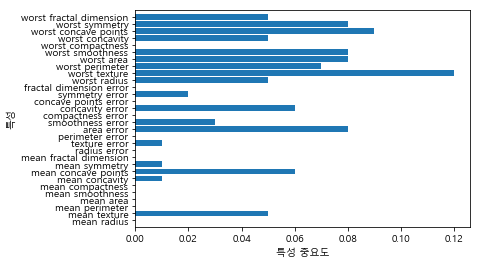

In [37]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### Conclusion
<pre>
학습률은 테스트 성능을 조금밖에 개선하지 못했다. 하지만 트리의 최대 깊이를 낮추는 것은
모델 성능 향상에 크게 기여했다.
</pre>

## 그래디언트 부스팅(gradient boosting) vs 랜덤 포레스트(random forest)

<pre>
(가) 그래디언트 부스팅은 일부 특성을 완전히 무시한다.
(나) 랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델의 마지막 성능까지 확인할 때 ,그래디언트 부스팅을 사용.
(다) 머신러닝 문제에 부스팅 적용시(xgboost)패키지와 파이썬 인터페이스 검토 필요
</pre>
### 장단점과 매개변수
<pre>
장점 : 
    (가) 이진 특성이 연속적인 특성에서도 잘 동작함.
    (나) 특성의 스케일을 조정하지 않아도 된다.
단점 : 
    (가) 매개변수를 잘 조정해야 하고 훈련 시간이 길다.
    (나) 고차원 데이터에서는 잘 작동하지 않음(트리 기반 모델의 특성)
</pre>

### 중요 매개 변수
<pre>
n_estimators, learning_rate
(1) learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 함.
(2) n_estimators가 클수록 그래디언트 부스팅에서 n_estimators를 크게 하면 <b>모델이 복잡해지고 과대적합될 가능성</b>이 높다.
(3) 일반적인 관례 : 메모리 한도에서 <b>n_estimators를 맞추고, 적절한 learning_rate</b>를 찾는 것.
(4) <b>max_depth, 부스팅 모델에서는 매우 작게 설정</b>하고 트리의 깊이가 5보다 깊어지지 않게 한다.
</pre>